In [1]:
import hddm, os 
from sys import platform
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

if platform == 'linux2':
    home = '/data/'
elif platform == 'darwin': 
    home = '/Users/67981492/'
    
reg_dir = os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/')
model_dir = os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/model_objs')
model_traces_dir = os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/model_traces')

model_names = ('intercept_only_obs_reg_simple_acc', 'a_cpp_v_B_obs_reg_simple_acc',
              'v_cpp_a_B_obs_reg_simple_acc', 'a_cpp_obs_reg_simple_acc',
               'v_cpp_obs_reg_simple_acc', 'a_B_obs_reg_simple_acc', 'v_B_obs_reg_simple_acc')

/Users/67981492/miniconda3/envs/test_hddm2/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# find the winning model 
dic_df = pd.read_csv(os.path.join(reg_dir, 'dic_df.csv'))
dic_df.head()

,model,dic,intercept_diff_dic
0,a_B_obs_reg_simple_acc,-15845.124059,-83.421224
1,a_cpp_obs_reg_simple_acc,-15767.874687,-6.171851
2,a_cpp_v_B_obs_reg_simple_acc,-18460.653221,-2698.950386
3,intercept_only_obs_reg_simple_acc,-15761.702835,0.000000
4,v_B_obs_reg_simple_acc,-18454.470121,-2692.767286


In [3]:
# first assert that raw dic for intercept only model is highest 
assert (dic_df.loc[dic_df.model == 'intercept_only_obs_reg_simple_acc'].dic.values > dic_df.dic.values).sum() == (len(dic_df.values) - 1), 'check model dics'

In [4]:
# find the winning model 
winning_model_name = dic_df.loc[dic_df.intercept_diff_dic == dic_df.intercept_diff_dic.min(), 'model'].values[0] 

In [5]:
winning_model_obj = hddm.load(os.path.join(model_dir, winning_model_name)) 

In [6]:
# get the traces for the winning model 
winning_model_traces = pd.read_csv(os.path.join(model_traces_dir, str(winning_model_name)+ '_traces' + '.csv'))
winning_model_traces.head()

,a_Intercept,a_Intercept_std,a_cpp,t,t_std,v_B,v_Intercept,v_Intercept_std
0,1.036966,0.081339,-0.038766,0.118969,0.027957,0.393361,0.629952,0.518806
1,1.039334,0.075021,-0.026212,0.125010,0.039777,0.403468,0.394207,0.502261
2,1.024017,0.074042,-0.022614,0.113975,0.027362,0.414831,0.479023,0.459411
3,1.027375,0.072947,-0.035546,0.116072,0.025618,0.401529,0.375118,0.467236
4,1.046602,0.075720,-0.053973,0.112255,0.021505,0.394868,0.623739,0.504700


In [7]:
obs_data = pd.read_csv(home+'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv', engine='python')

In [8]:
obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,cumulative_reward,iti,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,599.0,0.670199,2.385458,1.0,0,36,0.305556,0.099471,0.000000,0.000000
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,598.0,0.259707,1.939019,1.0,1,36,0.305556,0.035079,-1.241007,0.000000
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,599.0,0.740615,2.498060,1.0,2,36,0.305556,0.023075,-0.595781,-1.241007
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,598.0,0.250242,1.742433,1.0,3,36,0.305556,0.019881,-0.306135,-0.595781
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,599.0,0.700190,2.350417,1.0,4,36,0.305556,0.018539,-0.139394,-0.306135


# Posterior probability distributions

Text(0.5,0,'$\\beta_{a\\textasciitilde \\Omega}$')

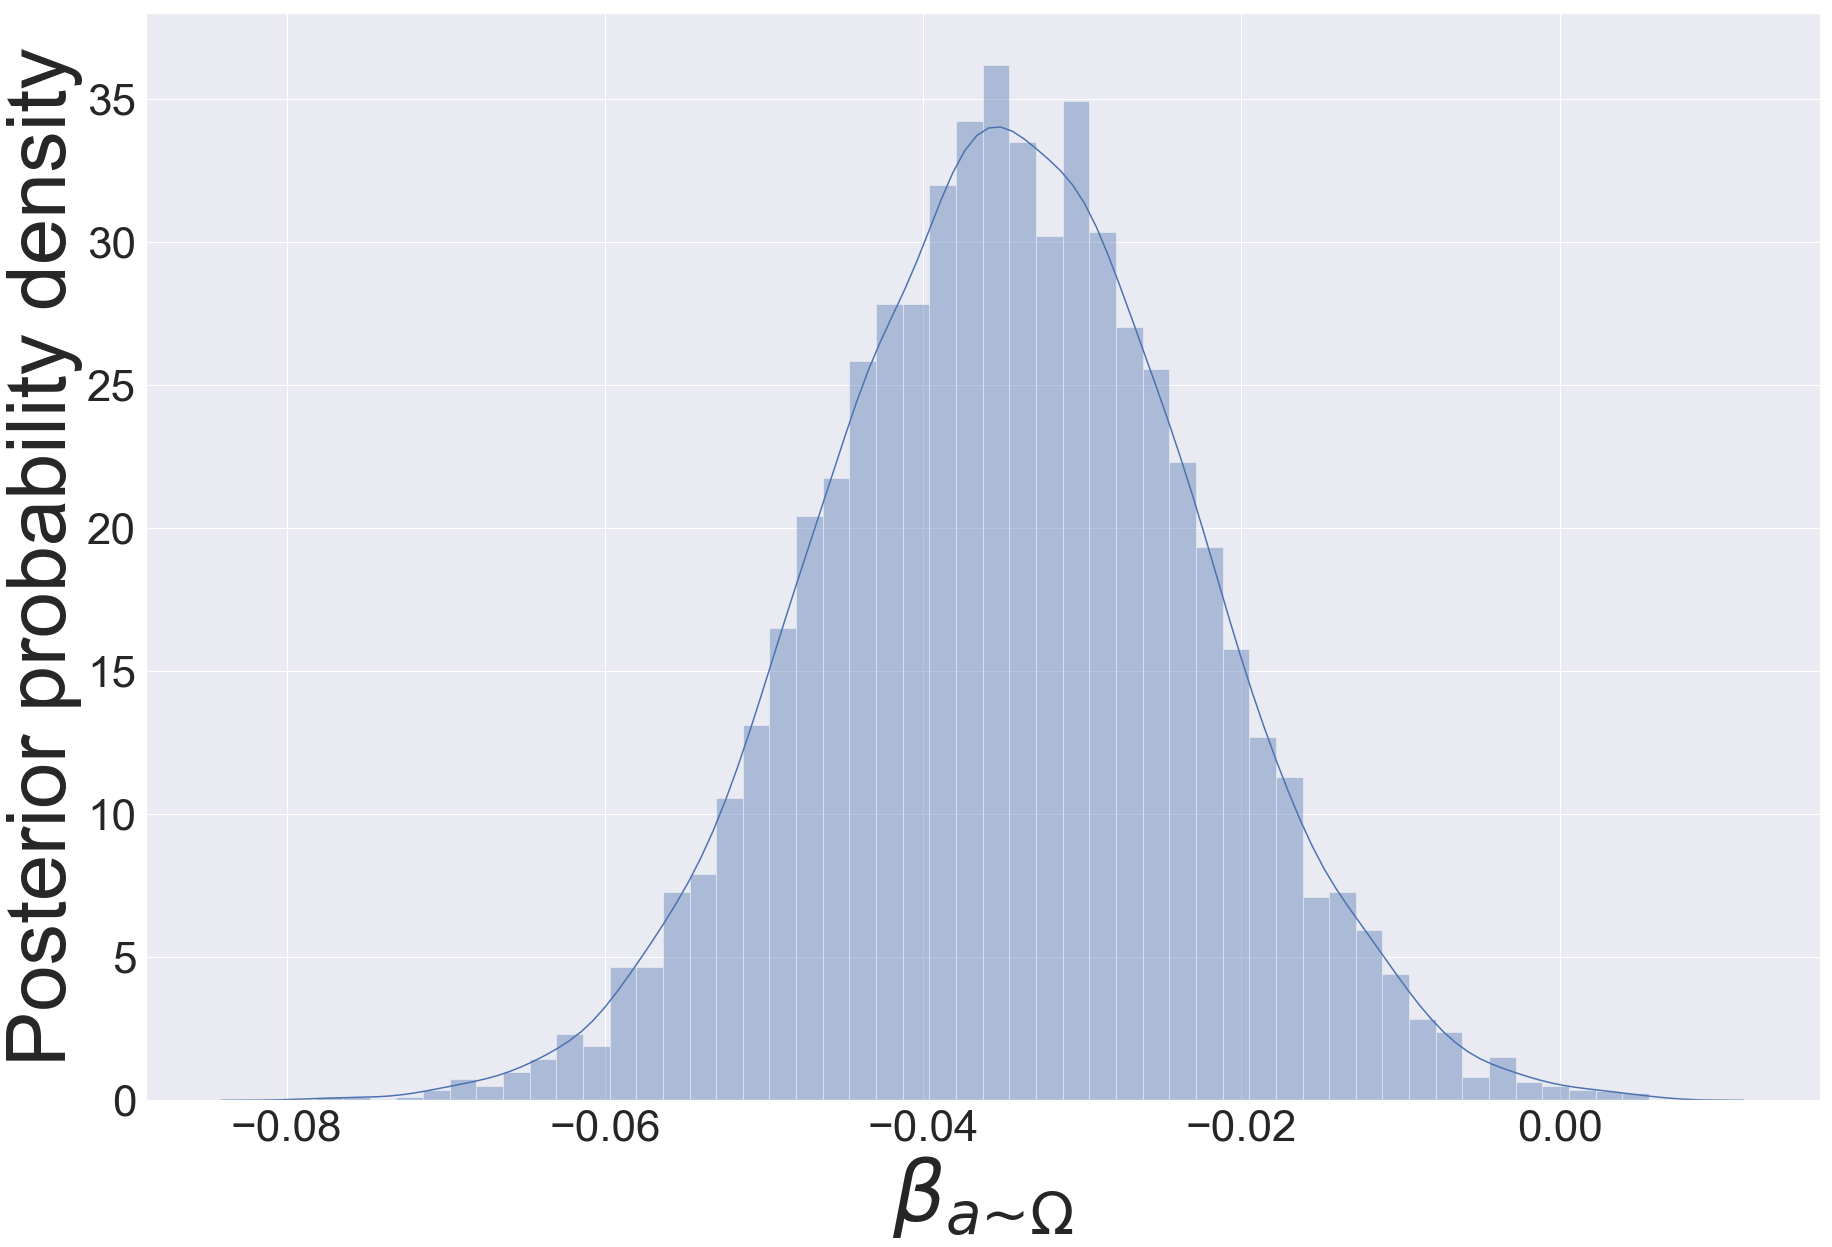

In [9]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))

sns.distplot(winning_model_traces.a_cpp)
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{a\textasciitilde \Omega}$',fontsize='xx-large')

Text(0.5,0,'$\\beta_{v\\textasciitilde B}$')

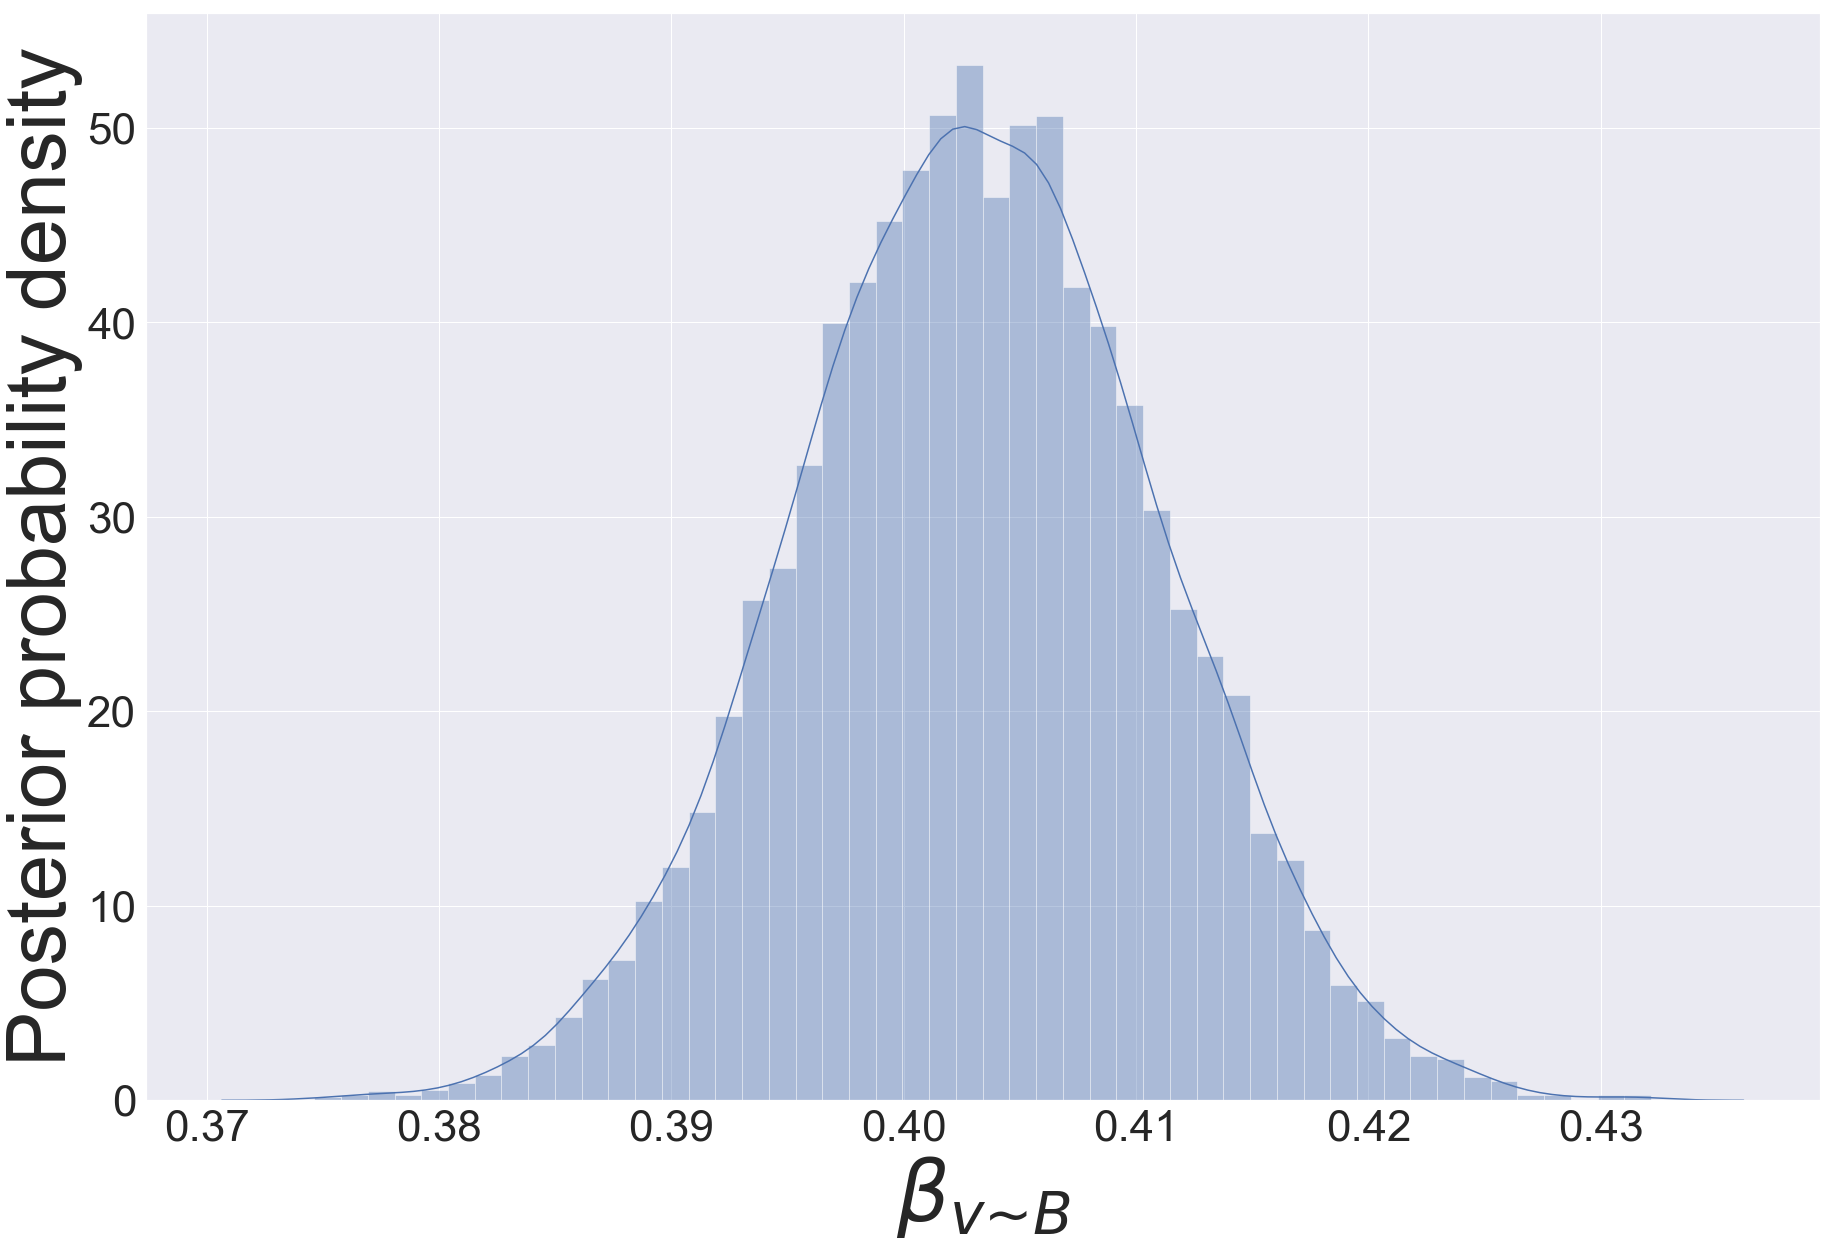

In [10]:
sns.set(font_scale=4) 
plt.figure(figsize=(30,20))

sns.distplot(winning_model_traces.v_B)
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')

# Bayesian stats

In [11]:
print("P(a_cpp < 0) = ", (winning_model_traces.a_cpp < 0 ).mean())

('P(a_cpp < 0) = ', 0.998)


In [12]:
print("P(v_B > 0) = ", (winning_model_traces.v_B > 0 ).mean())

('P(v_B > 0) = ', 1.0)


# Trial-by-trial regression estimates

In [13]:
v0 = winning_model_traces.v_Intercept.mean()
v_beta = winning_model_traces.v_B.mean()

In [14]:
a0 = winning_model_traces.a_Intercept.mean()
a_beta = winning_model_traces.a_cpp.mean()

In [15]:
# all of the regression estimates 
obs_data['v_est'] = v0 + v_beta * obs_data.ideal_B.shift(1)
obs_data['a_est'] = a0 + a_beta * obs_data.cpp.shift(1)

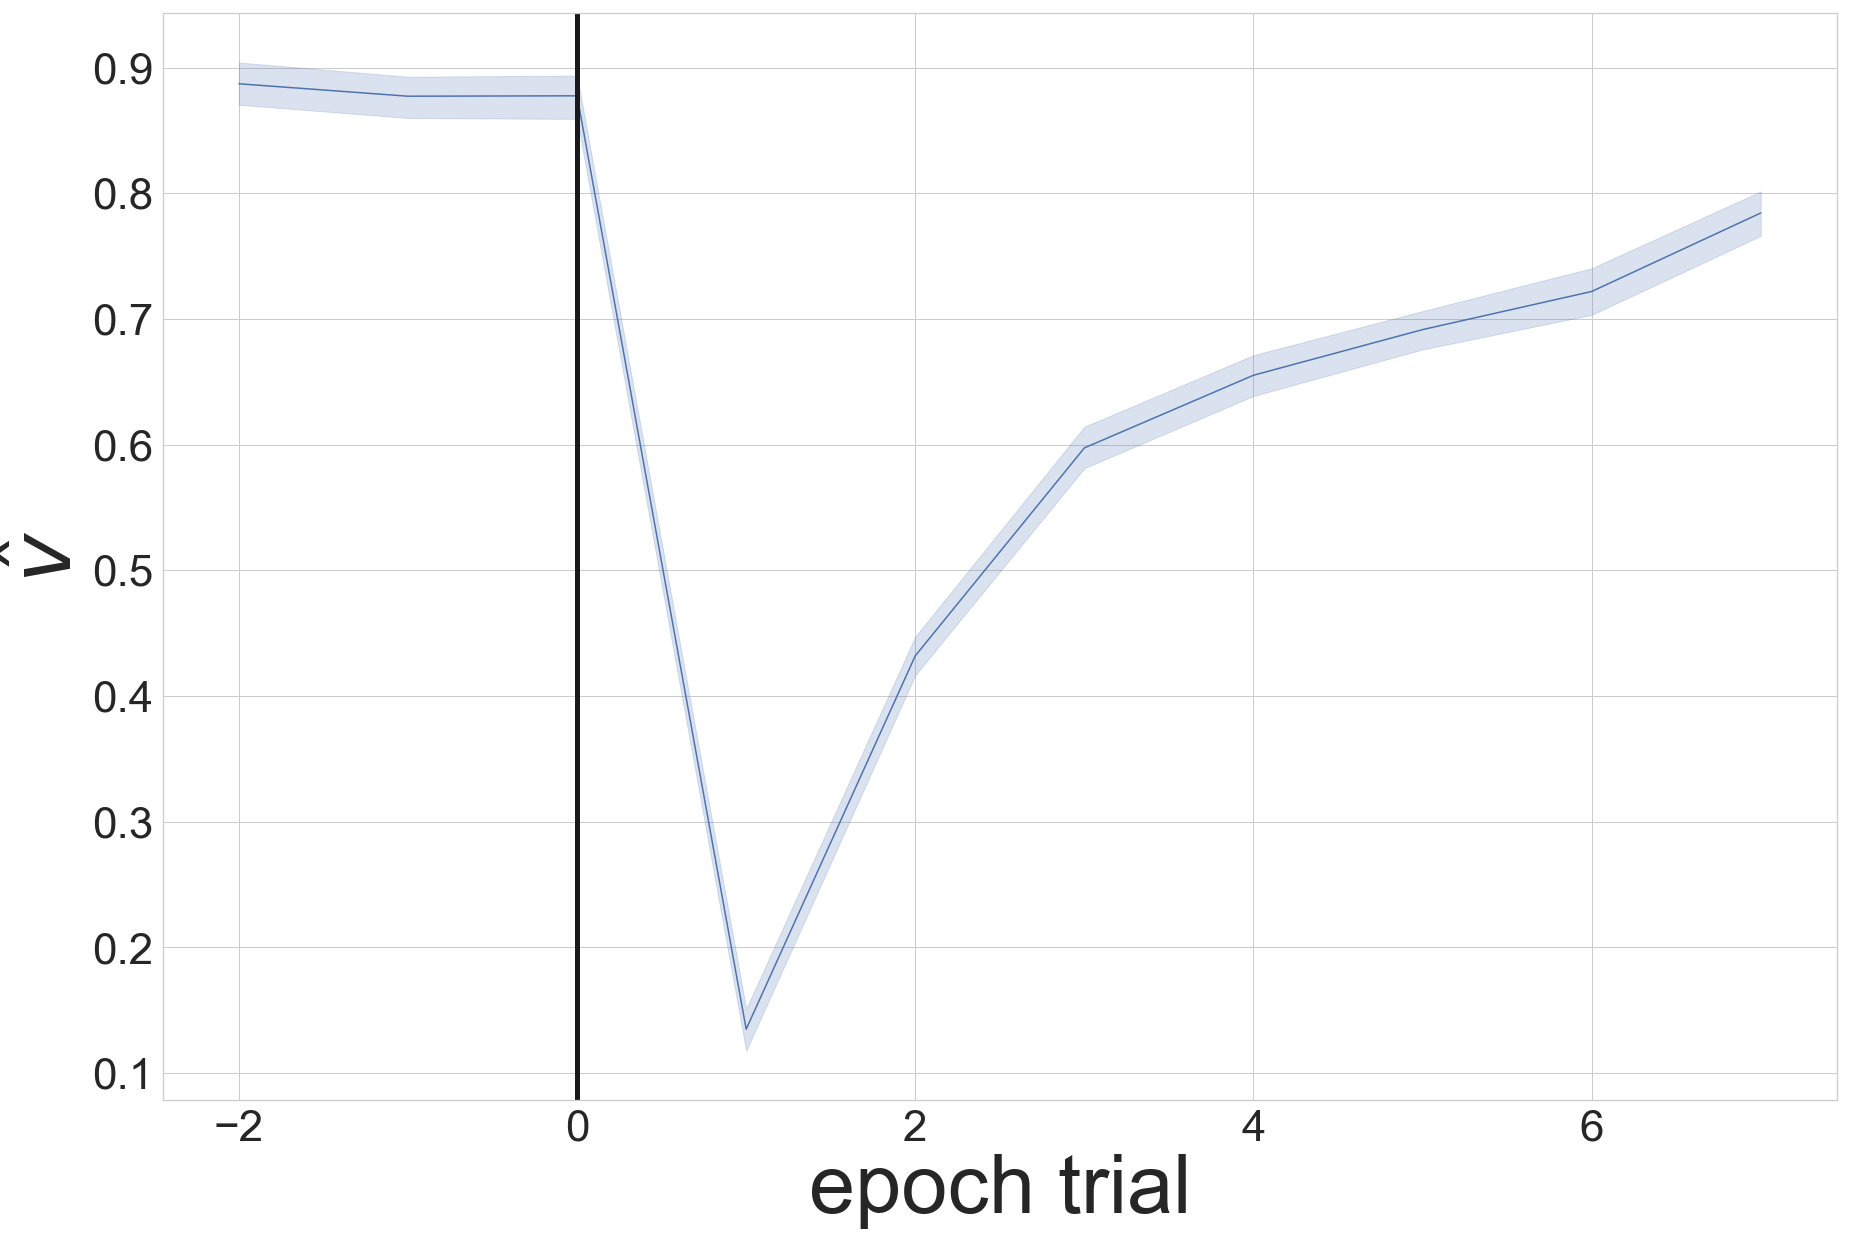

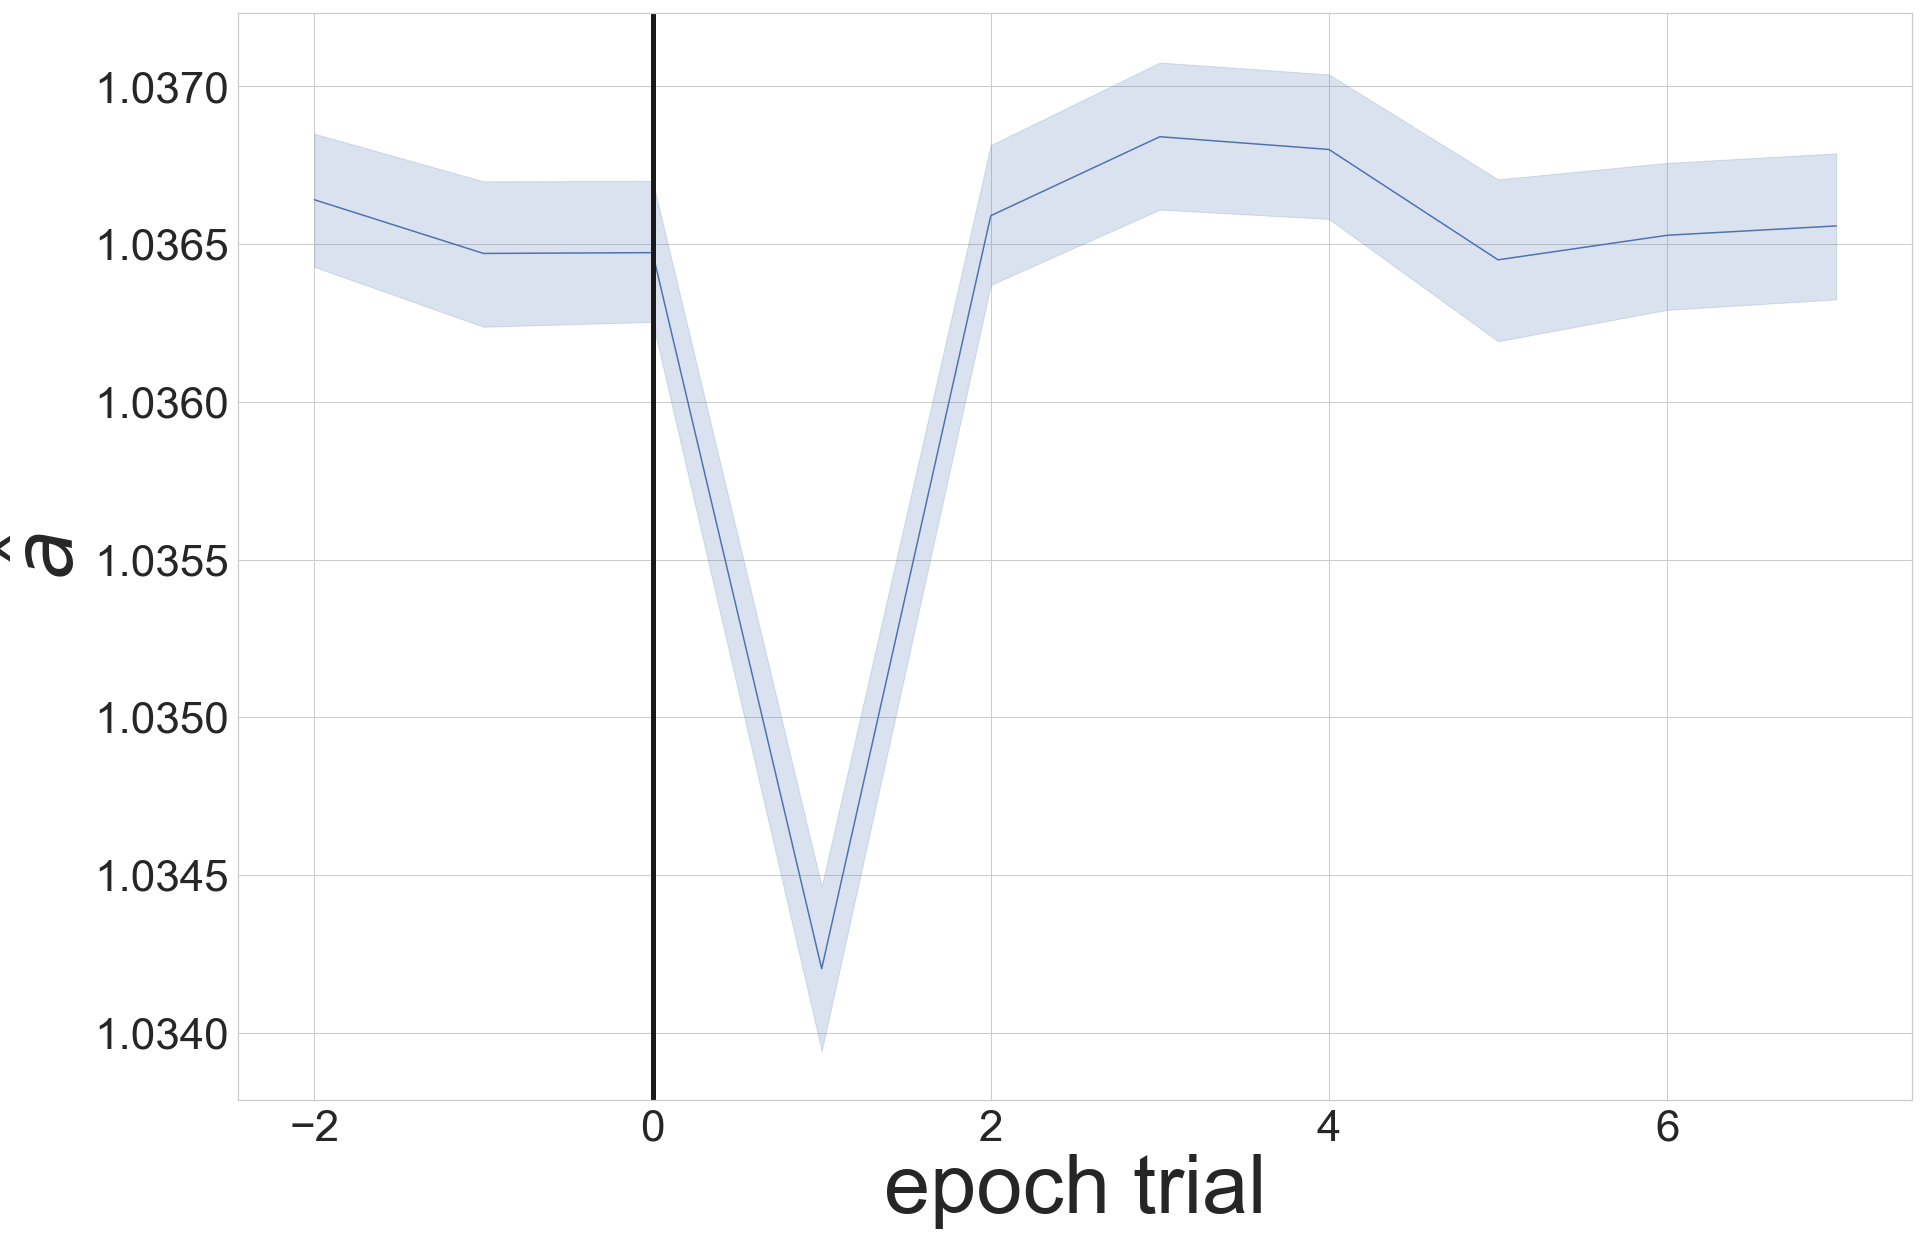

In [16]:
# plot time series of estimates

sns.set(font_scale=4, style='whitegrid') 
plt.figure(figsize=(30,20))
sns.lineplot(data=obs_data.loc[obs_data.shifted_epoch_trial < 8], x='shifted_epoch_trial', y='v_est')
plt.xlabel('epoch trial', fontsize='xx-large')
plt.ylabel(r'$\hat{v}$', fontsize='xx-large')
plt.axvline(0, linestyle='-', linewidth=5, color='k')

sns.set(font_scale=4, style='whitegrid') 
plt.figure(figsize=(30,20))
sns.lineplot(data=obs_data.loc[obs_data.shifted_epoch_trial < 8], x='shifted_epoch_trial', y='a_est')
plt.xlabel('epoch trial', fontsize='xx-large')
plt.ylabel(r'$\hat{a}$', fontsize='xx-large')
plt.axvline(0, linestyle='-', linewidth=5, color='k')

In [17]:
obs_data.head()

,ID,experiment,condition,trial,shifted_epoch_trial,cp_with_slow_fast,obs_cp_with_slow_fast,p_id_accuracy,rt,lr_choice,...,total_trial_time,epoch_n,epoch_trial,n_epoch_trials,prop_112,cpp,ideal_B,target_B,v_est,a_est
0,761,conflict,hc,0,0,1.0,0.0,1,0.711570,1.0,...,2.385458,1.0,0,36,0.305556,0.099471,0.000000,0.000000,NaN,NaN
1,761,conflict,hc,1,1,0.0,1.0,0,0.681410,1.0,...,1.939019,1.0,1,36,0.305556,0.035079,-1.241007,0.000000,0.489341,1.036777
2,761,conflict,hc,2,2,0.0,0.0,1,0.767118,0.0,...,2.498060,1.0,2,36,0.305556,0.023075,-0.595781,-1.241007,-0.010970,1.039001
3,761,conflict,hc,3,3,0.0,0.0,0,0.507209,1.0,...,1.742433,1.0,3,36,0.305556,0.019881,-0.306135,-0.595781,0.249152,1.039416
4,761,conflict,hc,4,4,0.0,0.0,1,0.656259,1.0,...,2.350417,1.0,4,36,0.305556,0.018539,-0.139394,-0.306135,0.365923,1.039526


In [18]:
# obs_data.groupby(['ID'])[['a_est', 'v_est']].transform(lambda x: stats.zscore(x, nan_policy='omit'))

In [19]:
obs_data.to_csv(os.path.join(home, 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/av_est.csv'), index=False)